In [1]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


/Users/csuarezgurruchaga/Desktop/Digital-House/CLASE_23/dsad_2021/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


[<img src="https://www.digitalhouse.com/ar/logo-DH.png" width="400" height="200" align='right'>](http://digitalhouse.com.ar/)

# Optimizando el hiper parámetro $\alpha$ 

Habrán notado que en el ejemplo anterior seteamos el _hiperparámetro_ $\alpha$ en 0.5. Esta fue una decisión arbitraria, y existen maneras de determinar este valor empíricamente.

En general, debemos decidir la forma de elegir el parámetro $\alpha$ y existen formas automáticas de hacerlo. Una forma de hacerlo es con _validacion-cruzada_ o _cross-validation_ en inglés. Para esta práctica guiada, exploremos el ridge model que viene con funcionalidad para hacer [cross-validation](https://en.wikipedia.org/wiki/Cross-validation_%28statistics%29). 

Típicamente, el cross-validation funciona separando nuestro dataset entre datos para ajustar el modelo (training set) y datos para evaluar el modelo (testing set).

En este caso, el modelo que generamos con `RidgeCV` de scikit-learn, automáticamente prueba diferentes valores de $\alpha$. Ejecutá el siguiente código más de una vez. Deberías ver que elije diferentes valores de $\alpha$, ya que hace diferentes separaciones de los datos cada vez.
### Tomamos la misma función de la notebook anterior:

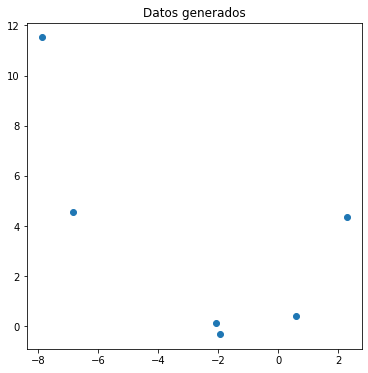

In [2]:
%matplotlib inline
import random
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
plt.rcParams['figure.figsize'] = 6,6

random.seed(5)

# Generamos un dataset de ejemplo
def generate_data():
    xs = np.arange(-3, 3, 1)
    data = [(2 * x - 3 * random.random(), (x - 3 * random.random()) * (x + random.random())) for x in xs]
    data.sort()
    xs = [x for (x, y) in data]
    ys = [y for (x, y) in data]
    
    return xs, ys

xs, ys = generate_data()
xs2, ys2 = generate_data()

plt.scatter(xs, ys)
plt.title("Datos generados")
plt.show()

### Ridge CV (Cross Validation)

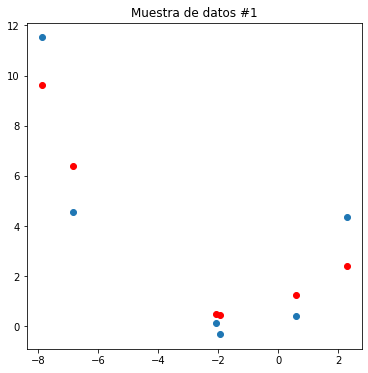

r^2: 0.8795916302875311
alpha: 0.1


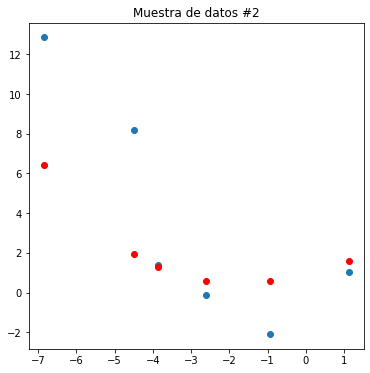

r^2: 0.4643547388841617


In [3]:
# instanciamos un modelo 
rlmcv = linear_model.RidgeCV(alphas=np.linspace(0.1,100, 1000), cv=3, normalize=True,scoring='r2')


# Ajustamos nuevamente nuestro modelo, esta vez con RidgeCV
X = np.vander(xs, 4)[:,:-1]
y = ys
rlmcv.fit(X, y)
predictions = rlmcv.predict(X)

plt.scatter(xs, ys)
plt.title("Muestra de datos #1")
plt.scatter(xs, predictions, c='r')
plt.show()
print ("r^2:", rlmcv.score(X, ys))
print ("alpha:", rlmcv.alpha_)

X = np.vander(xs2, 4)[:,:-1]
predictions = rlmcv.predict(X)

plt.scatter(xs2, ys2)
plt.title("Muestra de datos #2")
plt.scatter(xs2, predictions, c='r')
plt.show()
print ("r^2:", rlmcv.score(X, ys2))

/Users/csuarezgurruchaga/opt/anaconda3/envs/dhdsblend2021/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4547588050223559, tolerance: 0.01581582416056136
  model = cd_fast.enet_coordinate_descent_gram(


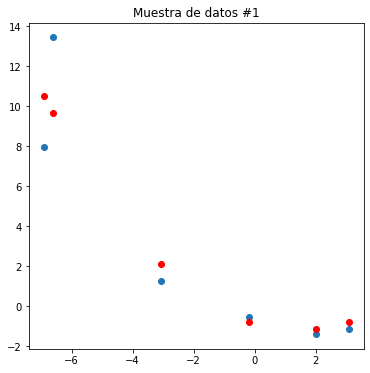

r^2: 0.8837197933184835
alpha: 0.11009009009009008


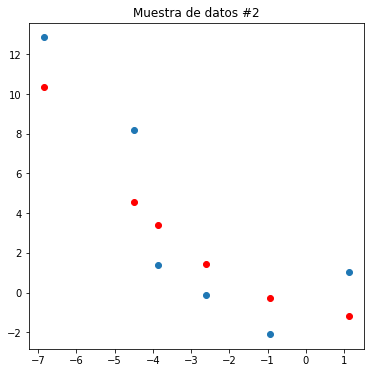

r^2: 0.7931744343438685


In [4]:
lassocv = linear_model.LassoCV(alphas=np.linspace(0.01,100, 1000), cv=3, normalize=True)
xs, ys = generate_data()


# Ajustamos nuevamente nuestro modelo, esta vez con LassoCV
X = np.vander(xs, 4)[:,:-1]
y = ys
lassocv.fit(X, y)
predictions = lassocv.predict(X)

plt.scatter(xs, ys)
plt.title("Muestra de datos #1")
plt.scatter(xs, predictions, c='r')
plt.show()
print ("r^2:", lassocv.score(X, ys))
print ("alpha:", lassocv.alpha_)

X = np.vander(xs2, 4)[:,:-1]
predictions = lassocv.predict(X)

plt.scatter(xs2, ys2)
plt.title("Muestra de datos #2")
plt.scatter(xs2, predictions, c='r')
plt.show()
print ("r^2:", lassocv.score(X, ys2))

¿Que paso con Lasso? ¿Porque no alcanza convergencia?

## Para ampliar

https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/
    
https://pythonquestion.com/post/lasso-on-sklearn-does-not-converge/    